Connection successful!


C:\Users\rafael\AppData\Local\Temp\ipykernel_10684\1220722684.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


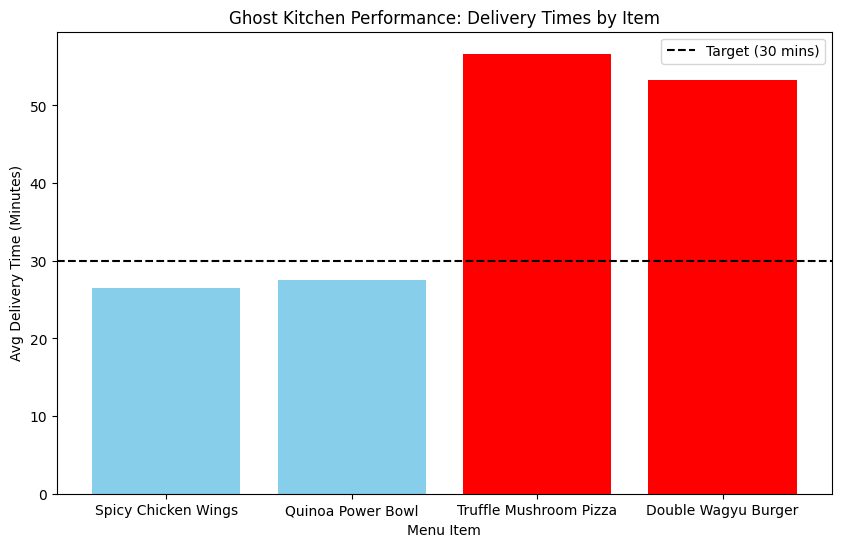

In [12]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# 1. Establish the connection
try:
    conn = psycopg2.connect(
        dbname="Ghost_Kitchen_Optimizer", 
        user="postgres", 
        password="Android22@", 
        host="localhost", 
        port="5432"
    )
    print("Connection successful!")
except Exception as e:
    print(f"Error: {e}")

# 2. Write your SQL Query
# This query looks at performance by Item Name
query = """
SELECT 
    m.item_name,
    AVG(EXTRACT(EPOCH FROM (o.delivery_time - o.order_time))/60) AS avg_delivery_time
FROM Orders o
JOIN Menu_Items m ON o.item_id = m.item_id
GROUP BY m.item_name;
"""

# 3. Load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)


colors = ['red' if x > 30 else 'skyblue' for x in df['avg_delivery_time']]
# 4. Create the Visualization
plt.figure(figsize=(10,6))
plt.bar(df['item_name'], df['avg_delivery_time'], color=colors)
plt.axhline(y=30, color='black', linestyle='--', label='Target (30 mins)') # Benchmarking
plt.xlabel('Menu Item')
plt.ylabel('Avg Delivery Time (Minutes)')
plt.title('Ghost Kitchen Performance: Delivery Times by Item')
plt.legend()
plt.show()

# Close the connection


In [2]:
df.to_csv('kitchen_report.csv')